In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px
import statistics

In [ ]:
balls=pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")
matches=pd.read_csv("IPL_Matches_2008_2022.csv")

matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
print(balls.info())
print(balls.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [ ]:
matches.head

<bound method NDFrame.head of           ID        City        Date   Season  MatchNumber  \
0    1312200   Ahmedabad  2022-05-29     2022        Final   
1    1312199   Ahmedabad  2022-05-27     2022  Qualifier 2   
2    1312198     Kolkata  2022-05-25     2022   Eliminator   
3    1312197     Kolkata  2022-05-24     2022  Qualifier 1   
4    1304116      Mumbai  2022-05-22     2022           70   
..       ...         ...         ...      ...          ...   
945   335986     Kolkata  2008-04-20  2007/08            4   
946   335985      Mumbai  2008-04-20  2007/08            5   
947   335984       Delhi  2008-04-19  2007/08            3   
948   335983  Chandigarh  2008-04-19  2007/08            2   
949   335982   Bangalore  2008-04-18  2007/08            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
1    Royal Challengers Bangalore             Rajasthan Royals   
2    Royal Challengers Bangalo

In [ ]:
print(matches.info())
print(matches.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [ ]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [ ]:
balls.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [ ]:
print("Matches played at :", matches["City"].unique())
print("\n Teams Participated :", matches["Team1"].unique())
print("\n Matches played so far: ",matches.shape[0])

Matches played at : ['Ahmedabad' 'Kolkata' 'Mumbai' 'Navi Mumbai' 'Pune' 'Dubai' 'Sharjah'
 'Abu Dhabi' 'Delhi' 'Chennai' nan 'Hyderabad' 'Visakhapatnam'
 'Chandigarh' 'Bengaluru' 'Jaipur' 'Indore' 'Bangalore' 'Kanpur' 'Rajkot'
 'Raipur' 'Ranchi' 'Cuttack' 'Dharamsala' 'Kochi' 'Nagpur' 'Johannesburg'
 'Centurion' 'Durban' 'Bloemfontein' 'Port Elizabeth' 'Kimberley'
 'East London' 'Cape Town']

 Teams Participated : ['Rajasthan Royals' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Kolkata Knight Riders' 'Punjab Kings'
 'Mumbai Indians' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']

 Matches played so far:  950


In [ ]:
matches['Season']=pd.DatetimeIndex(matches["Date"]).year
matches.head()
matches_per_season=matches.groupby(["Season"])["ID"].count().reset_index().rename(columns={"ID":"Matches"})
print(matches_per_season)

    Season  Matches
0     2008       58
1     2009       57
2     2010       60
3     2011       73
4     2012       74
5     2013       76
6     2014       60
7     2015       59
8     2016       60
9     2017       59
10    2018       60
11    2019       60
12    2020       60
13    2021       60
14    2022       74


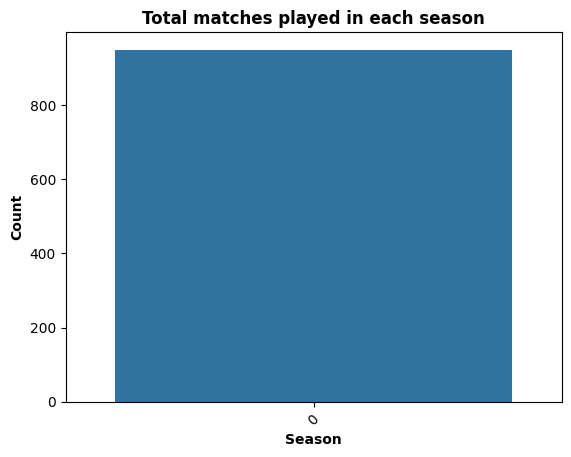

In [ ]:
sns.countplot(matches["Season"])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Season", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Total matches played in each season", fontsize=12,fontweight="bold")
plt.show()

In [ ]:
winning_team=matches.groupby(["WinningTeam"])["ID"].count().reset_index().rename(columns={"ID":"Matches Won"})
print(winning_team)

                    WinningTeam  Matches Won
0           Chennai Super Kings          121
1               Deccan Chargers           29
2                Delhi Capitals           36
3              Delhi Daredevils           67
4                 Gujarat Lions           13
5                Gujarat Titans           12
6               Kings XI Punjab           88
7          Kochi Tuskers Kerala            6
8         Kolkata Knight Riders          114
9          Lucknow Super Giants            9
10               Mumbai Indians          131
11                Pune Warriors           12
12                 Punjab Kings           13
13             Rajasthan Royals           96
14       Rising Pune Supergiant           10
15      Rising Pune Supergiants            5
16  Royal Challengers Bangalore          109
17          Sunrisers Hyderabad           75


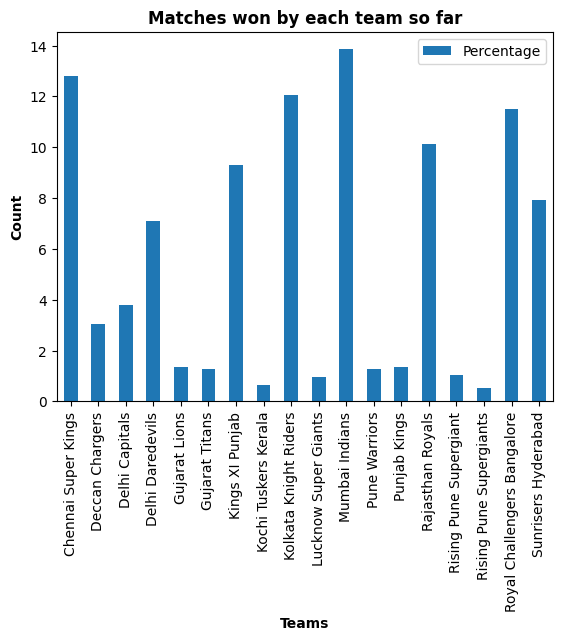

In [ ]:
winning_team["Percentage"]=((winning_team["Matches Won"]/winning_team["Matches Won"].sum())*100).sort_values()
winning_team.plot(x="WinningTeam",y="Percentage",kind='bar')
plt.xlabel("Teams", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Matches won by each team so far", fontsize=12,fontweight="bold")
plt.show()

In [ ]:
venue=matches[["Venue","Team1","Team2","TossWinner","TossDecision","WinningTeam"]]
venue["TossLosser"]=matches["Team1"]
venue.loc[venue["TossWinner"]!=venue["Team1"],"TossLosser"]=venue["Team1"]
venue

,Venue,Team1,Team2,TossWinner,TossDecision,WinningTeam,TossLosser
0,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,Gujarat Titans,Rajasthan Royals
1,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,Royal Challengers Bangalore
2,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,Royal Challengers Bangalore,Royal Challengers Bangalore
3,"Eden Gardens, Kolkata",Rajasthan Royals,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,Rajasthan Royals
4,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,bat,Punjab Kings,Sunrisers Hyderabad
...,...,...,...,...,...,...,...
945,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,Kolkata Knight Riders
946,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,Mumbai Indians
947,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,Delhi Daredevils
948,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,Kings XI Punjab


In [ ]:
batting_win=venue[venue["BattingWin"]==1]
batting_win=batting_win.drop(columns=["BattingWin"])
batting_losses=venue[venue["BattingWin"]==0]
batting_losses=batting_losses.drop(columns=["BattingWin"])
batting_win

,Venue,WinningTeam,BattingTeam
2,"Eden Gardens, Kolkata",Royal Challengers Bangalore,Royal Challengers Bangalore
8,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,Lucknow Super Giants
9,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,Sunrisers Hyderabad
10,"Dr DY Patil Sports Academy, Mumbai",Delhi Capitals,Delhi Capitals
11,"Brabourne Stadium, Mumbai",Rajasthan Royals,Rajasthan Royals
...,...,...,...
933,Feroz Shah Kotla,Delhi Daredevils,Delhi Daredevils
935,M Chinnaswamy Stadium,Chennai Super Kings,Chennai Super Kings
940,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Kings XI Punjab
942,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Chennai Super Kings


matches played at each venue

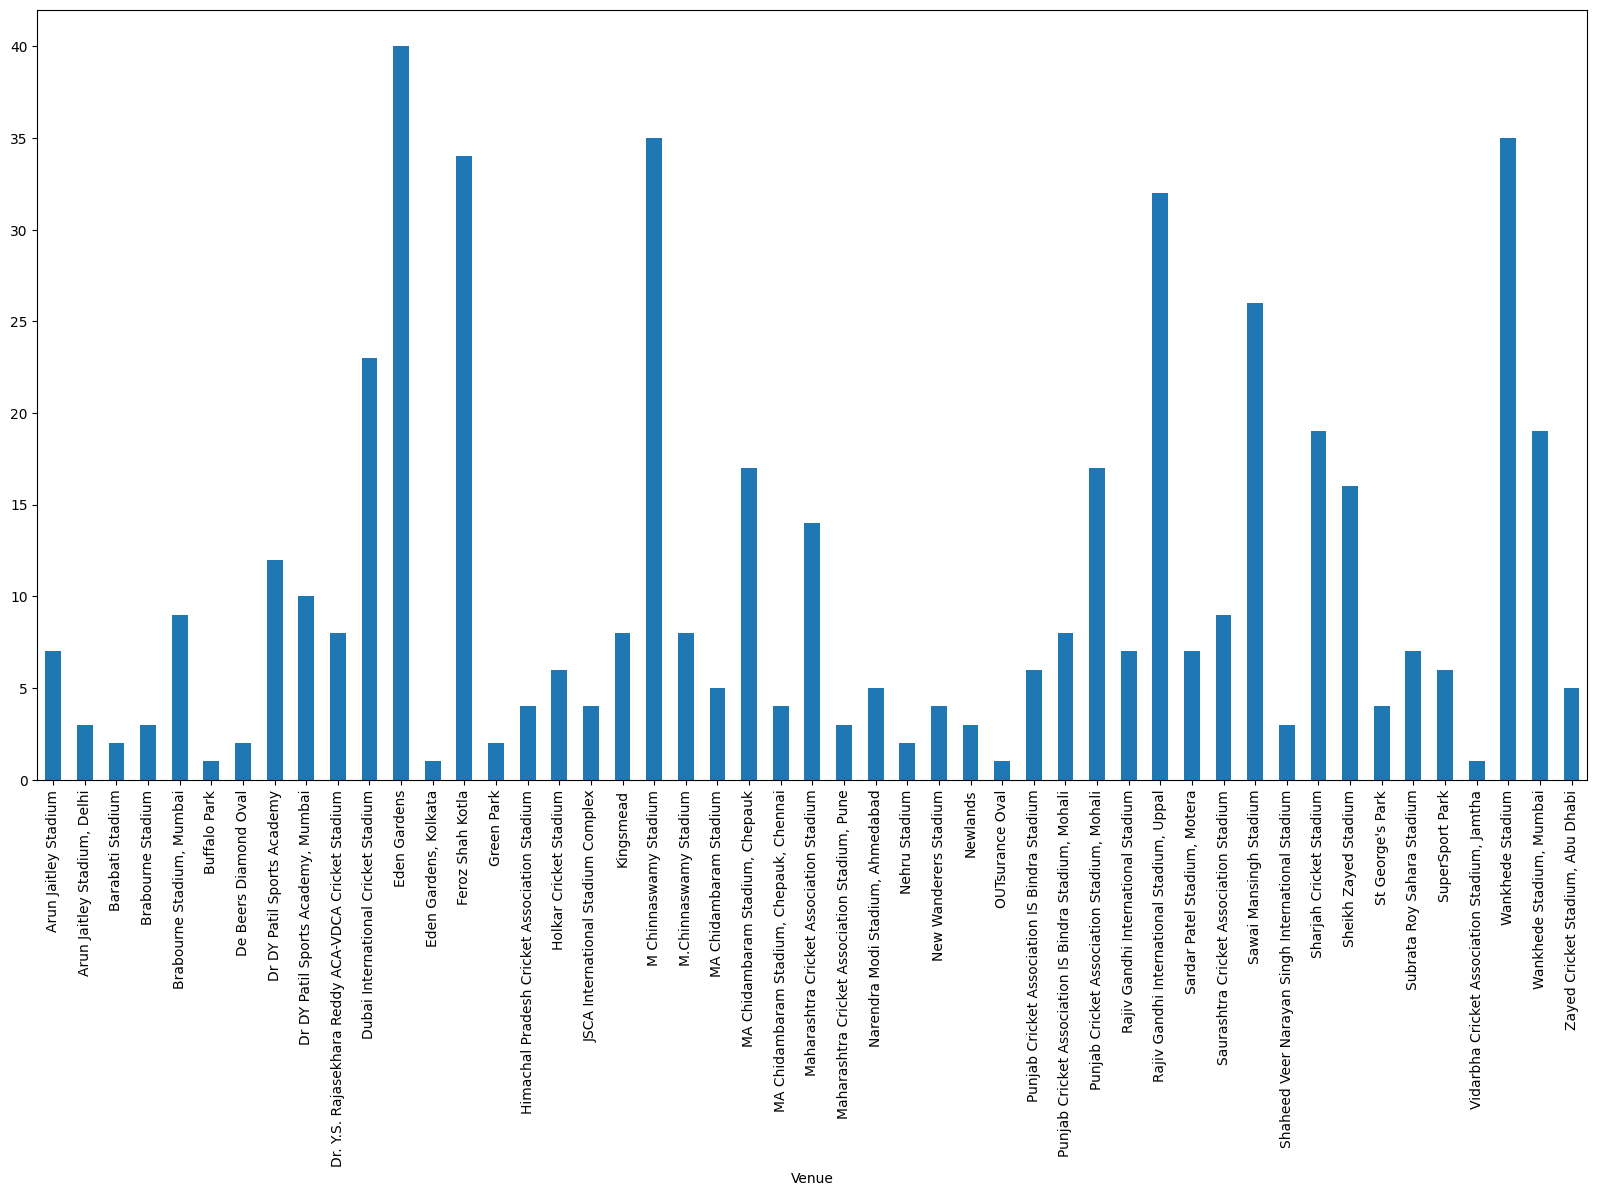

In [ ]:
plt.figure(figsize=(20,10))
batting_losses.groupby("Venue")["Venue"].count().plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

Success ratio of team that is batting first is maximum at Barabati Stadium .

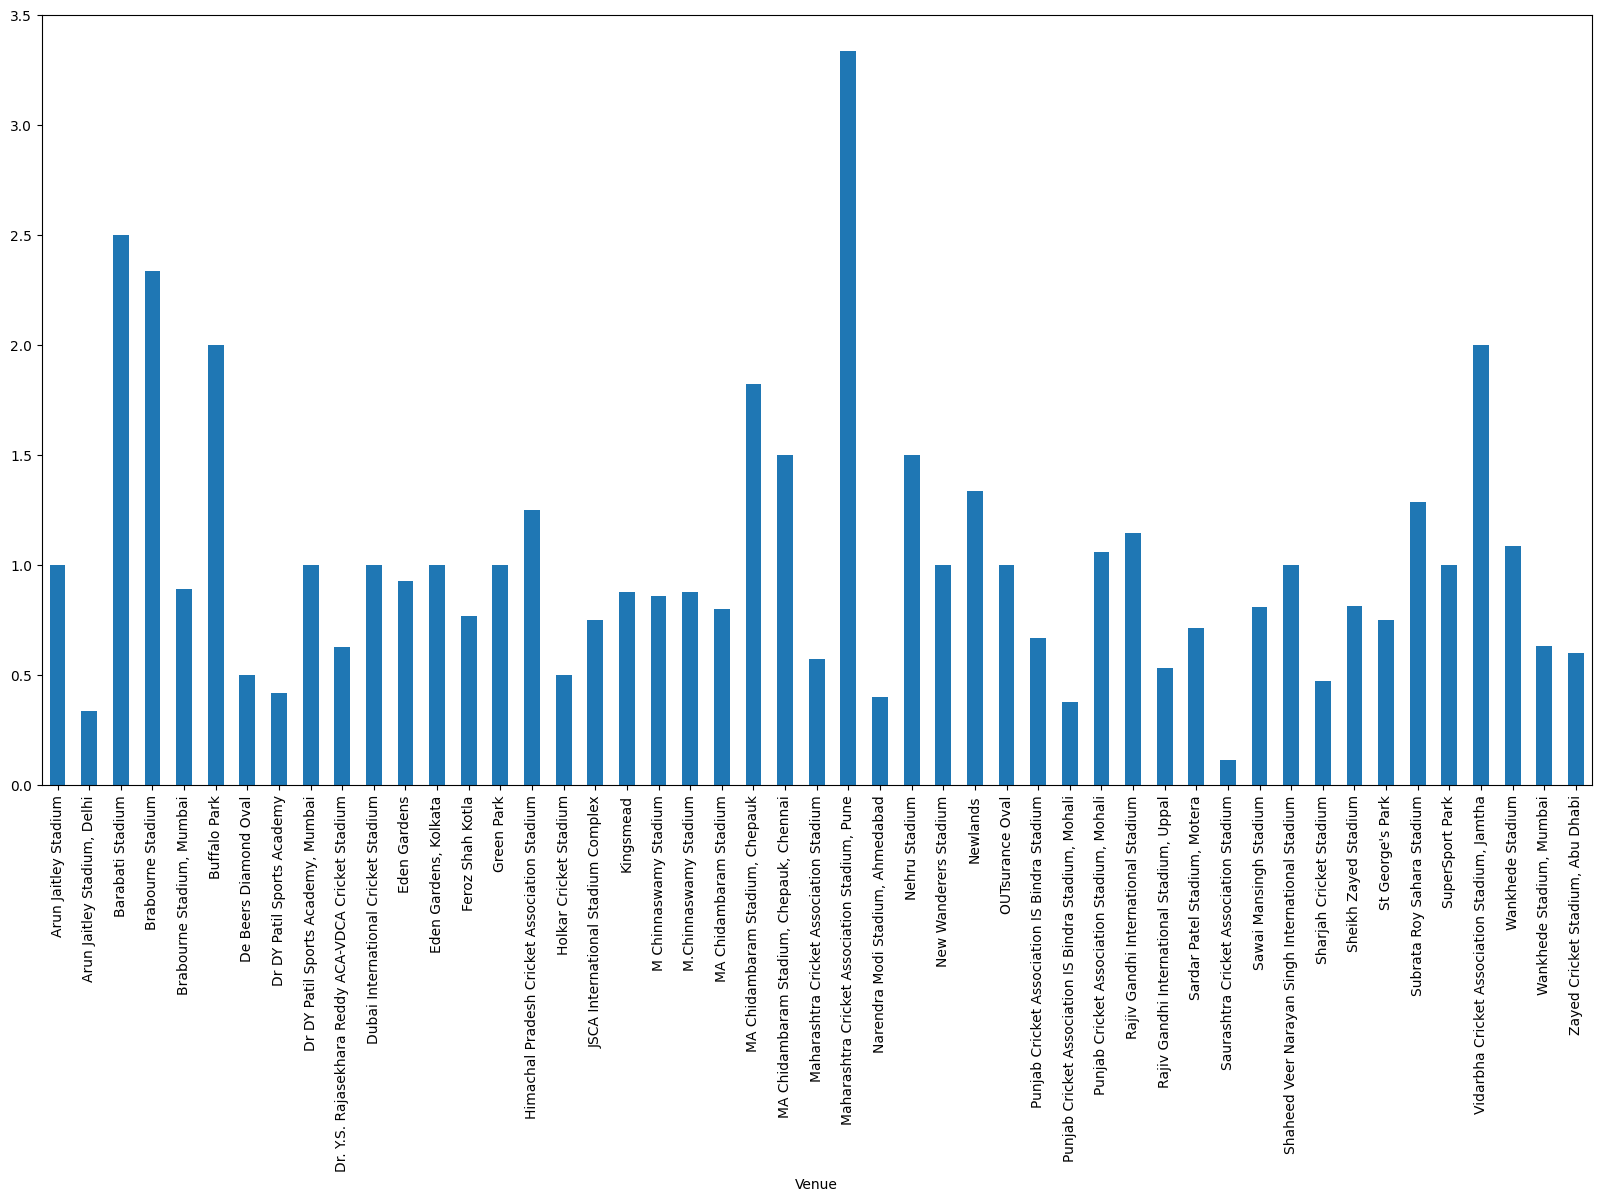

In [ ]:
x=batting_win.groupby("Venue")["Venue"].count()
y=batting_losses.groupby("Venue")["Venue"].count()
z=x/y
z=z.dropna()
plt.figure(figsize=(20,10))
z.plot(kind='bar')
plt.xticks(rotation='vertical')

plt.show()

matches won

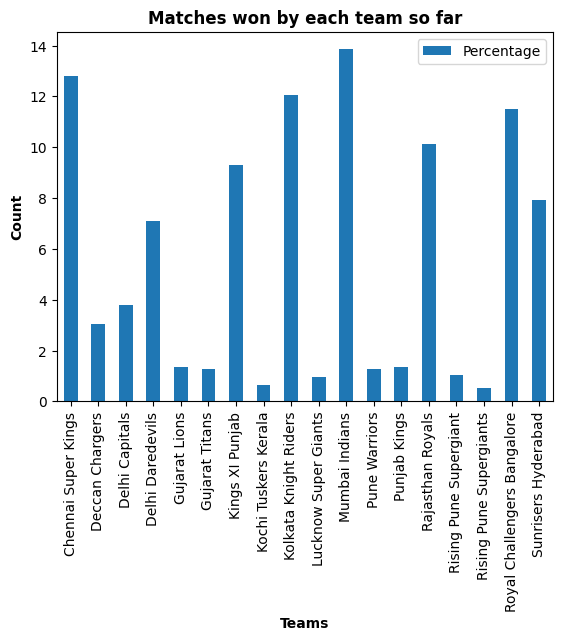

In [ ]:
winning_team=matches.groupby(["WinningTeam"])["ID"].count().reset_index().rename(columns={"ID":"Matches Won"})
winning_team["Percentage"]=((winning_team["Matches Won"]/winning_team["Matches Won"].sum())*100).sort_values()
winning_team.plot(x="WinningTeam",y="Percentage",kind='bar')
plt.xlabel("Teams", fontsize=10,fontweight="bold")
plt.ylabel("Count",fontsize=10,fontweight="bold")
plt.title("Matches won by each team so far", fontsize=12,fontweight="bold")
plt.show()

total runs made each season

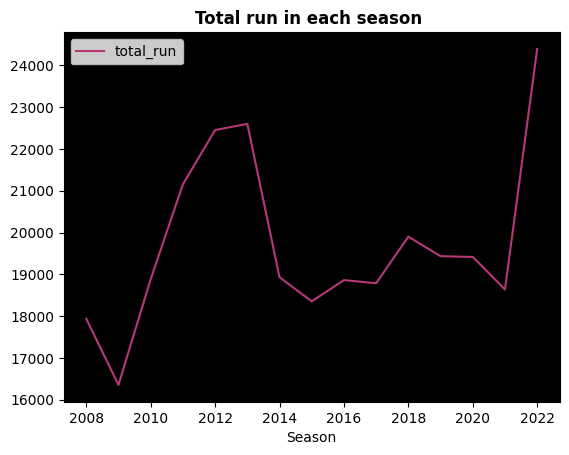

In [ ]:
season_data=matches[["ID","Season"]].merge(balls,left_on="ID",right_on="ID", how="left").drop("ID", axis=1)
season=season_data.groupby(["Season"])["total_run"].sum().reset_index()
p=season.set_index("Season")
ax=plt.axes()
ax.set(facecolor="black")

sns.lineplot(data=p,palette="magma")
plt.title("Total run in each season ", fontsize=12, fontweight="bold")
plt.show()

win percntage depending on toss decision

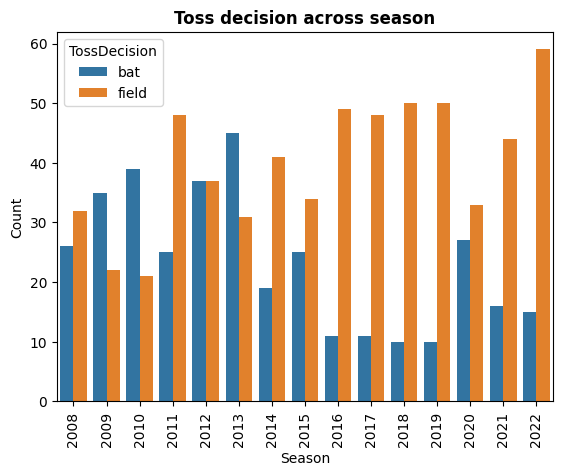

In [ ]:
sns.countplot(x="Season",hue="TossDecision",data=matches)
plt.xticks(rotation='vertical')
plt.title("Toss decision across season",fontsize=12,fontweight="bold")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

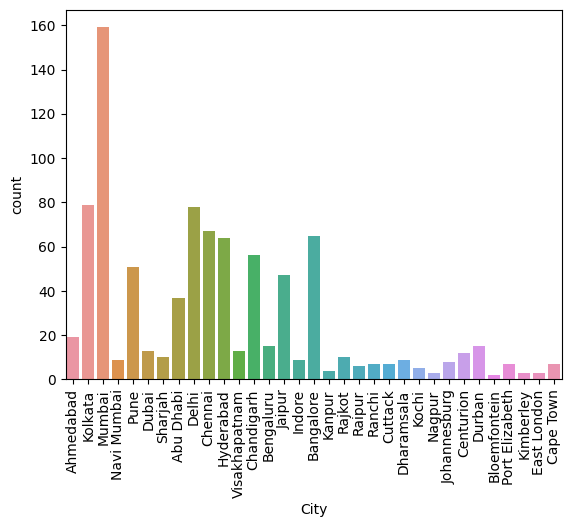

In [ ]:
sns.countplot(data=matches, x='City')
plt.xticks(rotation=90)
plt.show()

In [ ]:
total_score = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
total_score.head()

<ipython-input-67-2adaf6f4c884>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129


In [ ]:
total_score = total_score[total_score['innings']==1]

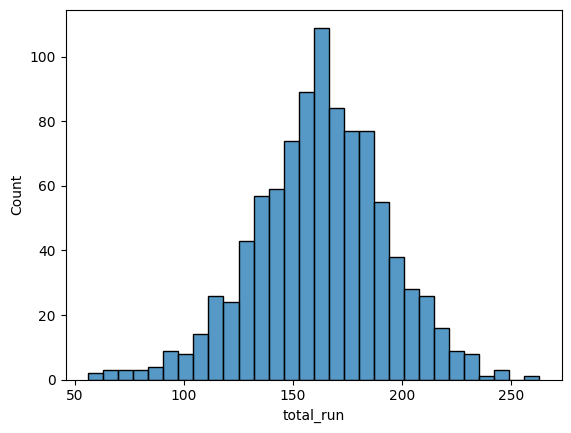

In [ ]:
sns.histplot(data=total_score, x='total_run', bins=30)
plt.show()

In [ ]:
total_score['target'] = total_score['total_run'] + 1
match_df = matches.merge(total_score[['ID','target']], on='ID')
match_df['Team1'].unique()

teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians'
]

In [ ]:

match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')


match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]
match_df = match_df[match_df['WinningTeam'].isin(teams)]

match_df.shape

(832, 21)

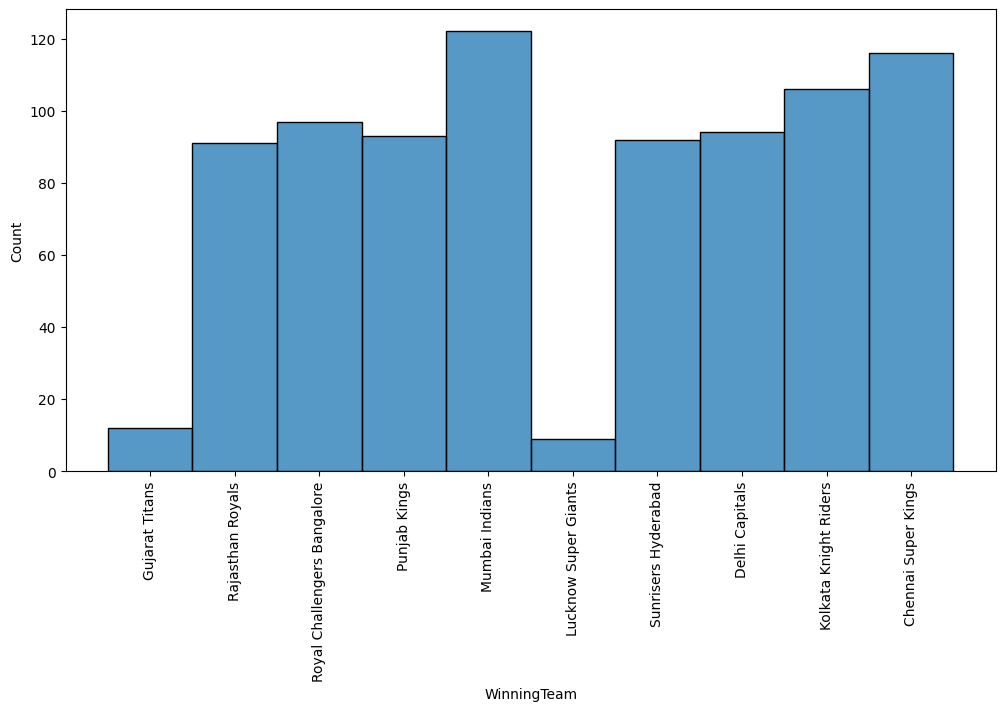

In [ ]:
plt.figure(figsize=(12, 6))  # Set the figure size as per your preference

sns.histplot(data=match_df, x='WinningTeam', bins=50)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
match_df['method'].unique()
match_df['method'].value_counts()
match_df = match_df[match_df['method'].isna()]
match_df = match_df[['ID','City','Team1','Team2','WinningTeam','target']].dropna()

balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

balls = balls[balls['BattingTeam'].isin(teams)]
balls_df = match_df.merge(balls, on='ID')

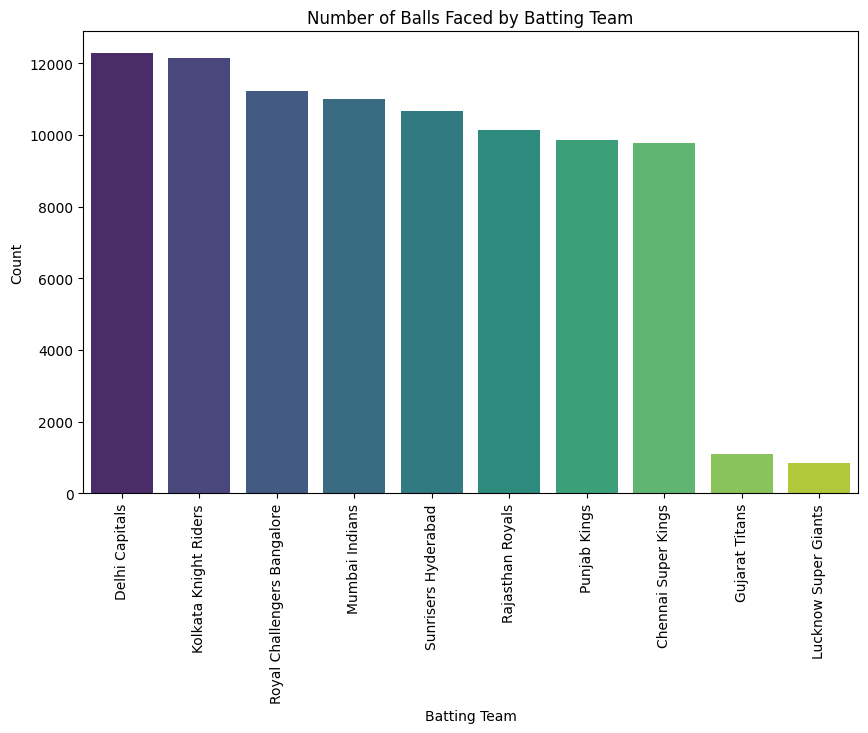

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size as per your preference

sns.barplot(data=balls_df['BattingTeam'].value_counts().reset_index(),
            x='index',
            y='BattingTeam',
            palette='viridis')

plt.xlabel('Batting Team')
plt.ylabel('Count')
plt.title('Number of Balls Faced by Batting Team')

plt.xticks(rotation=90)

plt.show()

In [ ]:
balls_df = balls_df[balls_df['innings']==2]
balls_df['current_score'] = balls_df.groupby('ID')['total_run'].cumsum()
balls_df['runs_left'] = np.where(balls_df['target']-balls_df['current_score']>=0, balls_df['target']-balls_df['current_score'], 0)
balls_df['balls_left'] = np.where(120 - balls_df['overs']*6 - balls_df['ballnumber']>=0,120 - balls_df['overs']*6 - balls_df['ballnumber'], 0)
balls_df['wickets_left'] = 10 - balls_df.groupby('ID')['isWicketDelivery'].cumsum()
balls_df['current_run_rate'] = (balls_df['current_score']*6)/(120-balls_df['balls_left'])
balls_df['required_run_rate'] = np.where(balls_df['balls_left']>0, balls_df['runs_left']*6/balls_df['balls_left'], 0)
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0
balls_df['result'] = balls_df.apply(result, axis=1)

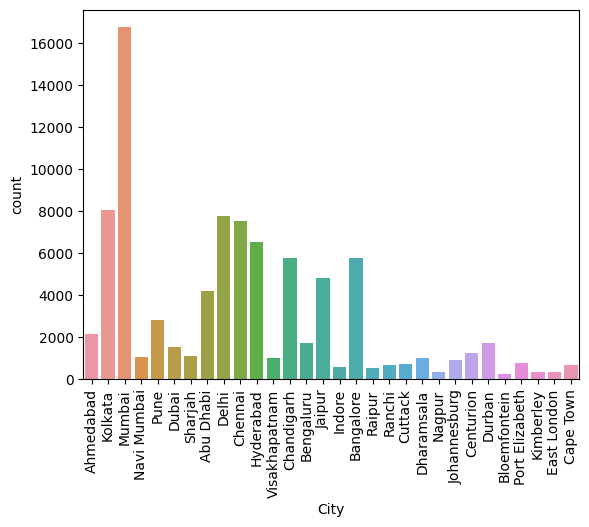

In [ ]:
index1 = balls_df[balls_df['Team2']==balls_df['BattingTeam']]['Team1'].index
index2 = balls_df[balls_df['Team1']==balls_df['BattingTeam']]['Team2'].index
balls_df.loc[index1, 'BowlingTeam'] = balls_df.loc[index1, 'Team1']
balls_df.loc[index2, 'BowlingTeam'] = balls_df.loc[index2, 'Team2']
final_df = balls_df[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
sns.countplot(data=final_df, x='City')
plt.xticks(rotation=90)
plt.show()

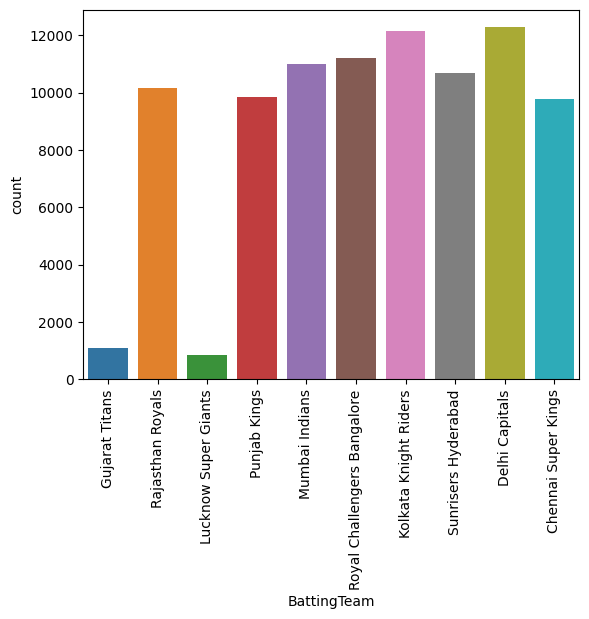

In [ ]:
sns.countplot(data=final_df, x='BattingTeam')
plt.xticks(rotation=90)
plt.show()

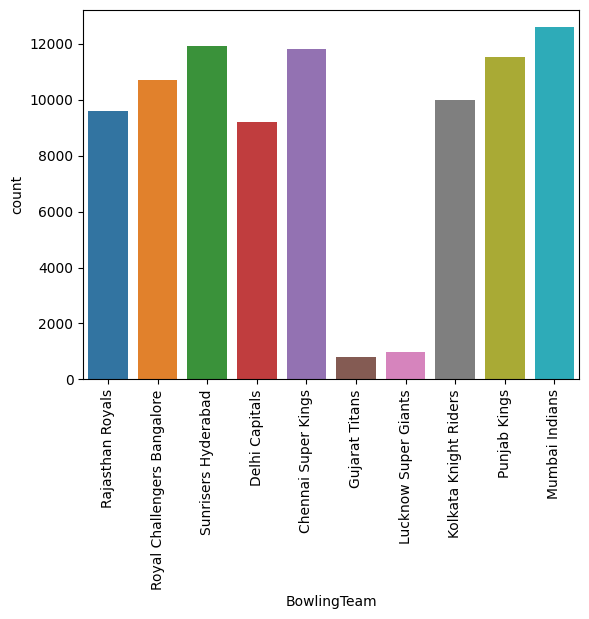

In [ ]:
sns.countplot(data=final_df, x='BowlingTeam')
plt.xticks(rotation=90)
plt.show()

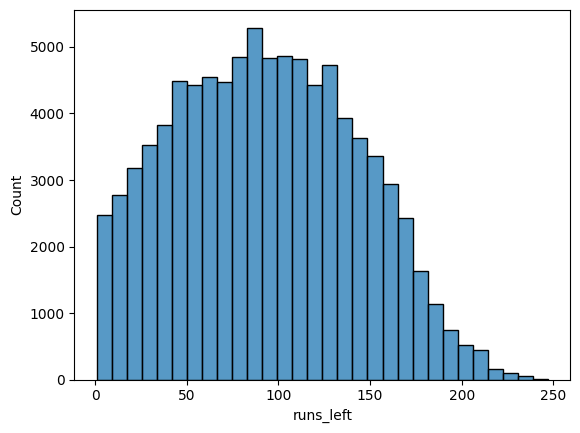

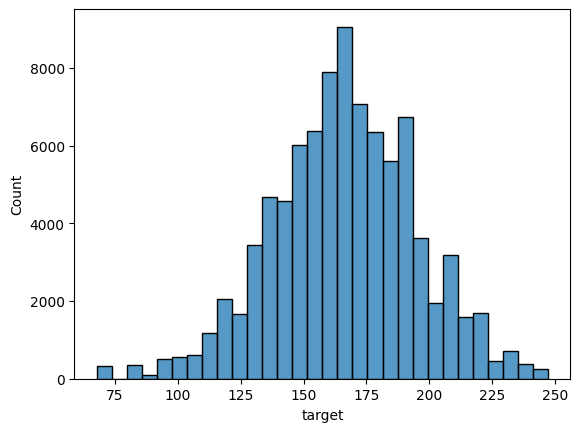

In [ ]:
sns.histplot(data=final_df[final_df['runs_left'] > 0], x='runs_left', bins=30)
plt.show()

sns.histplot(data=final_df, x='target', bins=30)
plt.show()

In [ ]:
final_df.isna().sum()

BattingTeam          0
BowlingTeam          0
City                 0
runs_left            0
balls_left           0
wickets_left         0
current_run_rate     0
required_run_rate    0
target               0
result               0
dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
],
remainder = 'passthrough')

In [ ]:
from sklearn.model_selection import train_test_split

X = final_df.drop('result', axis=1)
y = final_df['result']
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', RandomForestClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)
from sklearn.metrics import accuracy_score
a=accuracy_score(y_pred, y_test)
print(a)
pipe.predict_proba(X_test)
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))

0.9966329966329966
